In [1]:
import matplotlib.pyplot as plt
from q_learning.algorithm import QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_aeq-20bits2', 'model_final_h20bits3', 'model_h_c-20bits3']
experiment_id = 294291
experiment_type = 'q_learning'
model_files = {model_name: glob(f'tmp/{experiment_type}/{experiment_id}/{model_name}/*' ) for model_name in model_names}
policy_class = QLPolicy


Tag: tmp/q_learning/294291/model_h_c-20bits3/x_interval_policy
Episode 9 Reward: -193.58203821545584 || New State Found: False


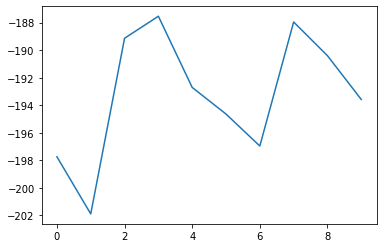

Reward Mean: -193.2544621212068
Reward std : 4.434038636389318


In [4]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

benchmarks = {}
evaluators = []
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = policy_class.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs, tag=policy_file.split('.')[0])
        evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [5]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

,reward,std
tmp/q_learning/294291/model_aeq-20bits2/best_policy,-182.720039,1.038742
tmp/q_learning/294291/model_aeq-20bits2/last_save_policy,-182.415570,0.706974
tmp/q_learning/294291/model_aeq-20bits2/x_interval_policy,-182.899700,0.928474
tmp/q_learning/294291/model_final_h20bits3/best_policy,-195.420914,2.657820
tmp/q_learning/294291/model_final_h20bits3/last_save_policy,-195.454268,2.709326
tmp/q_learning/294291/model_final_h20bits3/x_interval_policy,-196.124161,2.075219
tmp/q_learning/294291/model_h_c-20bits3/best_policy,-194.473503,4.390445
tmp/q_learning/294291/model_h_c-20bits3/last_save_policy,-191.735726,4.184537
tmp/q_learning/294291/model_h_c-20bits3/x_interval_policy,-193.254462,4.434039


In [6]:
model_files

{'model_aeq-20bits2': ['tmp/q_learning/294291/model_aeq-20bits2/best_policy.pkl',
  'tmp/q_learning/294291/model_aeq-20bits2/last_save_policy.pkl',
  'tmp/q_learning/294291/model_aeq-20bits2/x_interval_policy.pkl'],
 'model_final_h20bits3': ['tmp/q_learning/294291/model_final_h20bits3/best_policy.pkl',
  'tmp/q_learning/294291/model_final_h20bits3/last_save_policy.pkl',
  'tmp/q_learning/294291/model_final_h20bits3/x_interval_policy.pkl'],
 'model_h_c-20bits3': ['tmp/q_learning/294291/model_h_c-20bits3/best_policy.pkl',
  'tmp/q_learning/294291/model_h_c-20bits3/last_save_policy.pkl',
  'tmp/q_learning/294291/model_h_c-20bits3/x_interval_policy.pkl']}